# 1.1

In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\dolly\Downloads\Closing_Prices_5yrs.csv")

In [7]:
df = df.drop(columns=['Date'], axis=1)
df = df.fillna(df.mean())

df.iloc[:, :] = df.iloc[:, :].apply(pd.to_numeric, errors='coerce')

avg_returns = {}

for stock in df.columns[1:]:
    stock_prices = df[stock].dropna().values
    if len(stock_prices) > 5:
        returns = [(stock_prices[i + 5] - stock_prices[i]) / stock_prices[i] for i in range(len(stock_prices) - 5)]
        avg_returns[stock] = sum(returns) / len(returns) if returns else 0
    else:
        avg_returns[stock] = 0

result_df = pd.DataFrame(list(avg_returns.items()), columns=["Stock", "Average_5day_Return"])

print(result_df)


             Stock  Average_5day_Return
0     AXISBANK.csv             0.004155
1   BAJAJFINSV.csv             0.006121
2   BAJFINANCE.csv             0.007046
3   BHARTIARTL.csv             0.007628
4      HCLTECH.csv             0.006416
5     HDFCBANK.csv             0.002402
6   HINDUNILVR.csv             0.001872
7    ICICIBANK.csv             0.007338
8   INDUSINDBK.csv             0.004424
9         INFY.csv             0.004772
10         ITC.csv             0.005120
11    JSWSTEEL.csv             0.009157
12   KOTAKBANK.csv             0.002399
13          LT.csv             0.007500
14         M&M.csv             0.007578
15      MARUTI.csv             0.002922
16   NESTLEIND.csv             0.003779
17        NTPC.csv             0.007098
18   POWERGRID.csv             0.004763
19    RELIANCE.csv             0.004596
20        SBIN.csv             0.006764
21   SUNPHARMA.csv             0.007648
22  TATAMOTORS.csv             0.015253
23   TATASTEEL.csv             0.006658


# 1.2

In [9]:
std_returns = {}

for stock in df.columns[1:]:
    stock_prices = df[stock].dropna().values

    if len(stock_prices) > 5:
        returns = [(stock_prices[i + 5] - stock_prices[i]) / stock_prices[i] for i in range(len(stock_prices) - 5)]
        std_returns[stock] = np.std(returns) if returns else 0
    else:
        std_returns[stock] = 0
std_result_df = pd.DataFrame(list(std_returns.items()), columns=["Stock", "Std_dev"])

print(std_result_df)


             Stock   Std_dev
0     AXISBANK.csv  0.072994
1   BAJAJFINSV.csv  0.065439
2   BAJFINANCE.csv  0.082294
3   BHARTIARTL.csv  0.069502
4      HCLTECH.csv  0.064275
5     HDFCBANK.csv  0.047197
6   HINDUNILVR.csv  0.036338
7    ICICIBANK.csv  0.081470
8   INDUSINDBK.csv  0.095183
9         INFY.csv  0.057808
10         ITC.csv  0.083313
11    JSWSTEEL.csv  0.107854
12   KOTAKBANK.csv  0.044357
13          LT.csv  0.087934
14         M&M.csv  0.095288
15      MARUTI.csv  0.055659
16   NESTLEIND.csv  0.036509
17        NTPC.csv  0.083021
18   POWERGRID.csv  0.050907
19    RELIANCE.csv  0.054156
20        SBIN.csv  0.090429
21   SUNPHARMA.csv  0.078878
22  TATAMOTORS.csv  0.155495
23   TATASTEEL.csv  0.070611
24         TCS.csv  0.045805
25       TECHM.csv  0.062411
26       TITAN.csv  0.092246
27  ULTRACEMCO.csv  0.067481
28       WIPRO.csv  0.059377


# 1.3

In [10]:
returns = df.pct_change(periods=5)
cov_matrix = returns.cov()

print("COVAR MATRIX")
print(cov_matrix)

std_devs = returns.std()
print("CONSISTENCY CHECK")
print("-" * 60)
print("{:<20} {:<19} {:<12} {:<19}".format("Stock", "Var_from_cov", "Std_dev_squared", "Both_var_same"))
consistent = True

for stock in cov_matrix.columns:
    variance = cov_matrix.loc[stock, stock]
    std_dev_squared = std_devs[stock] ** 2
    is_consistent = np.isclose(variance, std_dev_squared, atol=1e-6)

    print(f"{stock:<19}{variance:<20f}{std_dev_squared:<20f}{'Yes' if is_consistent else 'No'}")

    if not np.isclose(variance, std_dev_squared, atol=1e-6):
        consistent = False

if consistent:
    print("\nThe covariance values are consistent with the computed standard deviations.")
else:
    print("\nThere are inconsistencies between the covariance values and the computed standard deviations.")


COVAR MATRIX
                ASIANPAINT.csv  AXISBANK.csv  BAJAJFINSV.csv  BAJFINANCE.csv  \
ASIANPAINT.csv        0.003446      0.002816        0.002054        0.003455   
AXISBANK.csv          0.002816      0.005333        0.003069        0.004725   
BAJAJFINSV.csv        0.002054      0.003069        0.004286        0.004075   
BAJFINANCE.csv        0.003455      0.004725        0.004075        0.006778   
BHARTIARTL.csv        0.002240      0.002936        0.002654        0.002964   
HCLTECH.csv           0.002450      0.002945        0.002004        0.003344   
HDFCBANK.csv          0.001784      0.002605        0.002009        0.002900   
HINDUNILVR.csv        0.001282      0.001221        0.001059        0.001357   
ICICIBANK.csv         0.003635      0.005241        0.003590        0.005552   
INDUSINDBK.csv        0.003195      0.005678        0.003547        0.005798   
INFY.csv              0.001863      0.002193        0.001177        0.002793   
ITC.csv               0.003

#1.4

In [11]:
highest_avg_stock = max(avg_returns, key=avg_returns.get)
highest_avg_return = avg_returns[highest_avg_stock]
highest_std_dev = std_devs[highest_avg_stock]

print(f"Stock with highest return: {highest_avg_stock}")
print(f"Highest Average Return: {highest_avg_return:.6f}")
print(f"Standard Deviation: {highest_std_dev:.6f}")

correlation_matrix = np.corrcoef(returns.fillna(0).T)
print("Highly correlated pairs")
correlated_pairs = []
stock_names = returns.columns
for i in range(len(stock_names)):
    for j in range(i + 1, len(stock_names)):
        correlated_pairs.append((stock_names[i], stock_names[j], correlation_matrix[i][j]))

correlated_pairs = sorted(correlated_pairs, key=lambda x: abs(x[2]), reverse=True)[:3]

for stock1, stock2, correlation_value in correlated_pairs:
    print(f"{stock1} & {stock2}: Correlation = {correlation_value:.6f}")

Stock with highest return: TATAMOTORS.csv
Highest Average Return: 0.015253
Standard Deviation: 0.155558
Highly correlated pairs
ICICIBANK.csv & SBIN.csv: Correlation = 0.901339
LT.csv & TITAN.csv: Correlation = 0.884361
AXISBANK.csv & ICICIBANK.csv: Correlation = 0.880656


# 1.5


The (??) should be 1,00,00,000 (1 crore), which is the total investment amount. This is because:

The left side Σ μᵢxᵢ gives us the total expected return in rupees (since xᵢ is in rupees and μᵢ is a rate)
On the right side, 0.00025 is the target return rate
To make the units match, we need to multiply the rate by the total investment amount

So the final constraint becomes:

Σµixi ≥ 0.00025 × (1,00,00,000)(return-rate)

# 1.6

In [ ]:
!pip install pyomo gurobipy
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt

In [18]:
mean_ret = returns.mean()  
cov_mat = returns.cov()  
model = pyo.ConcreteModel()
n_stocks = len(mean_ret)
model.stocks = pyo.RangeSet(0, n_stocks - 1)
model.alloc = pyo.Var(model.stocks, domain=pyo.NonNegativeReals)
model.budget = pyo.Constraint(expr=sum(model.alloc[i] for i in model.stocks) == 10_000_000)

C:\Users\dolly\AppData\Local\Temp\ipykernel_15068\2083353701.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expr=sum(mean_ret[i] * model.alloc[i] for i in model.stocks) >= target_ret


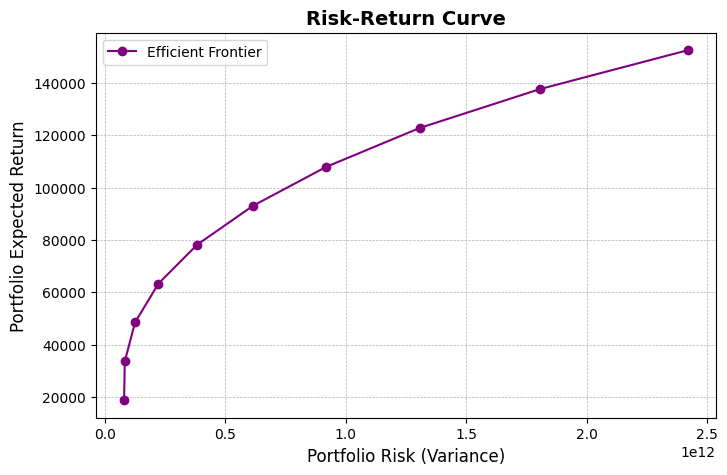

In [19]:
def optimize(target_ret):
    if hasattr(model, "ret_constraint"):
        model.del_component(model.ret_constraint)
    if hasattr(model, "risk_obj"):
        model.del_component(model.risk_obj)

    model.ret_constraint = pyo.Constraint(
        expr=sum(mean_ret[i] * model.alloc[i] for i in model.stocks) >= target_ret
    )

    model.risk_obj = pyo.Objective(
        expr=sum(model.alloc[i] * cov_mat.iloc[i, j] * model.alloc[j] 
                 for i in model.stocks for j in model.stocks),
        sense=pyo.minimize
    )

    solver = SolverFactory("gurobi")
    result = solver.solve(model, tee=False)

    if result.solver.status != pyo.SolverStatus.ok:
        return target_ret, None

    risk_val = sum(model.alloc[i].value * cov_mat.iloc[i, j] * model.alloc[j].value 
                   for i in model.stocks for j in model.stocks)

    return target_ret, risk_val

ret_targets = np.linspace(mean_ret.min() * 10_000_000, mean_ret.max() * 10_000_000, 10)
risk_values = []

for target in ret_targets:
    solved_ret, solved_risk = optimize(target)
    if solved_risk is not None:
        risk_values.append((solved_risk, solved_ret))
        

risk_values, ret_targets = zip(*risk_values)

plt.figure(figsize=(8, 5))
plt.plot(risk_values, ret_targets, marker='o', linestyle='-', color='purple', label="Efficient Frontier")
plt.xlabel("Portfolio Risk (Variance)", fontsize=12)
plt.ylabel("Portfolio Expected Return", fontsize=12)
plt.title("Risk-Return Curve", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()


# 1.7

To maximize the returns and constrain the risk :
formulation -
OBJECTIVE FUNCTION : max∑​μi​xi​
CONSTRAINTS : ∑​∑​xi​σij​xj​≤risk_threshold
 ∑ixi=1,00,00,000
 xi≥0

In [ ]:
opt_model = pyo.ConcreteModel()
num_stocks = len(mean_ret)
opt_model.stocks = pyo.RangeSet(0, num_stocks - 1)
opt_model.allocations = pyo.Var(opt_model.stocks, domain=pyo.NonNegativeReals)
opt_model.budget_constraint = pyo.Constraint(expr=sum(opt_model.allocations[i] for i in opt_model.stocks) == 10_000_000)

In [32]:
def optimize_with_risk_limit(risk_limit):
    if hasattr(opt_model, "risk_constraint"):
        opt_model.del_component(opt_model.risk_constraint)
    if hasattr(opt_model, "return_objective"):
        opt_model.del_component(opt_model.return_objective)
    
    opt_model.return_objective = pyo.Objective(expr=sum(mean_ret[i] * opt_model.allocations[i] for i in opt_model.stocks),sense=pyo.maximize)
    opt_model.risk_constraint = pyo.Constraint(expr=sum(opt_model.allocations[i] * cov_mat.iloc[i, j] * opt_model.allocations[j] 
                 for i in opt_model.stocks for j in opt_model.stocks) <= risk_limit)
    solver = SolverFactory("gurobi")
    result = solver.solve(opt_model, tee=False)
    if result.solver.status != pyo.SolverStatus.ok:
        print(f"Solver failed for risk limit {risk_limit}")
        return risk_limit, None
    portfolio_return = sum(mean_ret[i] * opt_model.allocations[i].value for i in opt_model.stocks)
    
    return risk_limit, portfolio_return

min_risk = 0
max_risk = 1e10
risk_thresholds = np.linspace(min_risk, max_risk, 10)
return_data = []

for risk in risk_thresholds:
    risk_val, return_val = optimize_with_risk_limit(risk)
    if return_val is not None:
        return_data.append((risk_val, return_val))

if not return_data:
    print("No valid solutions found. Check the risk thresholds or solver settings.")
else:
    risk_vals, return_vals = zip(*return_data)

    plt.figure(figsize=(8, 5))
    plt.plot(risk_vals, return_vals, marker='o', linestyle='-', color='blue', label="Return vs Risk")
    plt.xlabel("Portfolio Risk (Variance)", fontsize=12)
    plt.ylabel("Portfolio Expected Return", fontsize=12)
    plt.title("Return-Risk Curve (Max Return for Given Risk)", fontsize=14, fontweight='bold')
    plt.legend(fontsize=10)
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.show()


C:\Users\dolly\AppData\Local\Temp\ipykernel_15068\1824420037.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expr=sum(mean_ret[i] * opt_model.allocations[i] for i in opt_model.stocks),


model.name="unknown";
    - termination condition: infeasibleOrUnbounded
    - message from solver: Problem proven to be infeasible or unbounded.
Solver failed for risk limit 0.0
model.name="unknown";
    - termination condition: infeasibleOrUnbounded
    - message from solver: Problem proven to be infeasible or unbounded.
Solver failed for risk limit 1111111111.1111112
model.name="unknown";
    - termination condition: infeasibleOrUnbounded
    - message from solver: Problem proven to be infeasible or unbounded.
Solver failed for risk limit 2222222222.2222223
model.name="unknown";
    - termination condition: infeasibleOrUnbounded
    - message from solver: Problem proven to be infeasible or unbounded.
Solver failed for risk limit 3333333333.3333335
model.name="unknown";
    - termination condition: infeasibleOrUnbounded
    - message from solver: Problem proven to be infeasible or unbounded.
Solver failed for risk limit 4444444444.444445
model.name="unknown";
    - termination condit

1.8

In [36]:
n = len(df.columns) - 1
total_investment = 10_000_000
alloc_per_stock = total_investment / n
exp_ret = np.mean(list(avg_returns.values()))
cov_vals = cov_matrix.values
port_variance = 0
for i in range(n):
    for j in range(n):
        port_variance += (1 / n**2) * cov_vals[i, j]

port_risk = np.sqrt(port_variance)

print(f"Expected Return: {exp_ret * 100:.4f}")
print(f"Portfolio Risk: {port_risk:.4f}")


Expected Return: 0.5875
Portfolio Risk: 0.0584
